![](../img/330-banner.png)

# Tutorial 2

UBC 2024-25

## Outline

During this tutorial, we will focus on the ideas of generalization, training, validation and test scores, and cross-validation. Additionally, we will play with different algorithms and see how their hyperparameters affect their complexity.

All questions can be discussed with your classmates and the TAs - this is not a graded exercise!

## Imports

In [22]:
# import the libraries
import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), "code"))
# from plotting_functions import *
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

DATA_DIR = os.path.join(os.path.abspath(".."), "data/")
pd.set_option("display.max_colwidth", 200)

We are going to use the King County housing sale prediction data from the course introduction video. You can download the data from [here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

This is a **regression** problem:  we are trying to predict the sale price of each house.

In [23]:
housing_df = pd.read_csv(DATA_DIR + 'kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## EDA: Exploratory Data Analysis

Before tackling any data science problem, the first step is always familiarizing with the dataset.

### <font color='red'>Question 1</font>

Run the cells below and answer the following questions:
- How many samples are included in the dataset?
- Are the columns the correct type (strings as strings, numbers as numbers)? Do we have missing data?
- What is the average sale price?
- Looking at the column names, do you think some of them are not helpful in predicting the price of the house?

In [24]:
# How many data points do we have? 
housing_df.shape[0]

21613

In [25]:
# What is the type and count for each column?
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
# describe gives a summary of the numerical features in the dataframe
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
# What are the columns in the dataset? 
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

EDA can be much more extensive, but for this exercise we will stop here. 

Let's agree to drop the `ID`, `date`, and `zipcode` columns. ID is not helpful for prediction. Date may be interesting but it is a type of information that requires special handling, which we will see later in the course. Zipcode could also be interesting, but it is a categorical variable with too many values, and we do not know how to handle this yet. We will keep all the other (numerical) features.

In [28]:
# Dropping unused features, and separating features and target

X = housing_df.drop(columns = ['id', 'date', 'zipcode', 'price'])
y = housing_df['price']

## Data splitting

As discussed in class, it is important for models to generalize to unseen data, therefore we will set aside a subset of samples to evaluate the model on samples it has not been trained on.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## <font color='red'>Question 2: Baseline model</font>

As always, we will start by building a baseline model to use as reference. Build and score your model in the cell below. Remember that this is a *regression* problem, so you will not use `DummyClassifier`, but the corresponding model for regression!

Also, remember to score the model on the training and test set.

In [30]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train)

print("Train R^2 score:", dummy_model.score(X_train, y_train))
print("Test R^2 score:", dummy_model.score(X_test, y_test))

Train R^2 score: 0.0
Test R^2 score: -0.00010814646015933072


**Note:** did you check the value of a prediction from the baseline model? It is very close to the mean of `price`, as expected! But not exactly the same, as we set some samples aside for testing.

## <font color='red'>Question 3: Decision tree</font>

Let's now try a more sofisticated approach. We will use a `DecisionTreeRegressor` to predict the house prices. Run the code below and answer the following questions:
- Why is there a large gap between train and test scores?
- What would be the effect of increasing or decreasing test_size? How would that affect your confidence in the test score?
- Why are we setting the random_state? Is it a good idea to try a bunch of values for the random_state and pick the one which gives the best scores?

In [31]:
# Instantiate a class object 
dt = DecisionTreeRegressor(random_state=123)

# Train a decision tree on X_train, y_train
dt.fit(X_train, y_train)

# Score on the train set
dt.score(X_train, y_train)

0.9994394006711425

In [32]:
# Score on the test set
dt.score(X_test, y_test)

0.719915905190645

In [33]:
# If you are curious, you can see the depth of this tree - what do you think of this value? What does it tell us?
dt.get_depth()

39

## <font color='red'>Question 4: Hyperparameter tuning</font>

The model above is showing clear signs of **overfitting:** it learned *too much* from the training set, including noise and errors, and that has a negative impact on its ability to predict unseen samples. To fix his, we are going to force the tree to *learn less* by reducing its maximum depth.

Before we do that, we will further split the training set in training and validation, to avoid using the test set for hyperparameter tuning (which means breaking the golden rule - the test set can not influence the model in any way, not even in the choice of hyperparameter).

In [34]:
# Create a validation set 
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

Now, we will try different depth values and choose the best one.

In [35]:
tr_scores = []
valid_scores = []
depths = np.arange(1, 35, 2)

for depth in depths:  
    # Create and fit a decision tree model for the given depth  
    dt = DecisionTreeRegressor(max_depth=depth, random_state=123)

    dt.fit(X_tr, y_tr)
    # Calculate and append r2 scores on the training and validation sets
    tr_scores.append(dt.score(X_tr, y_tr))    
    valid_scores.append(dt.score(X_valid, y_valid))
    
results_single_valid_df = pd.DataFrame({"train_score": tr_scores, 
                           "valid_score": valid_scores},index = depths)
results_single_valid_df

,train_score,valid_score
1,0.319559,0.326616
3,0.603739,0.555180
5,0.754938,0.677567
7,0.833913,0.737285
9,0.890456,0.763480
11,0.931896,0.790521
13,0.963024,0.769030
15,0.981643,0.752728
17,0.991810,0.735637
19,0.996424,0.745925


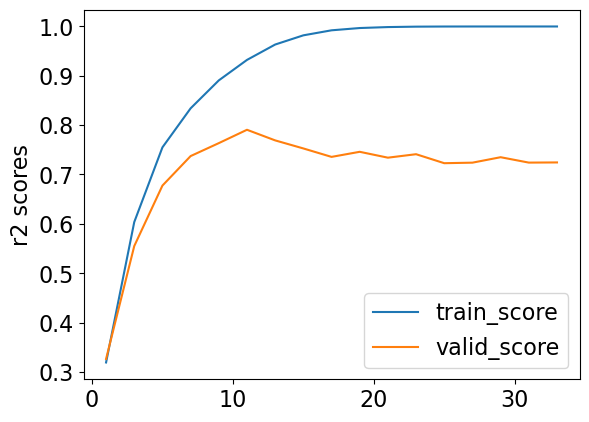

In [36]:
# Plotting the results above
results_single_valid_df[['train_score', 'valid_score']].plot(ylabel='r2 scores');

Answer the following questions:
- What is the best tree depth? How did you choose this value?
- How would you describe gap between training and validation set for smaller depth values? And what about higher values?

## <font color='red'>Question 5: Cross-validation</font>

Our validation set is not very big - only about 3500 samples. It is not exceedingly small, but it could still allow for some variance in the score if a different set was picked.

In [37]:
# To check the size of the validation set
X_valid.shape[0]

3458

In the cell below, we are going to observe this phenomenon, by using `cross_validate` on our best tree candidate (`max_depth` = 11). See how the test_scores change with every different fold?

**Notes:** 
- `cross_validate` has no concept of validation set, and it calls it test set instead. For our purposes, test_scores are validation scores
- Because we are using cross-validation, we can use the original X_train set, before we further divided it in training and validation set

In [38]:
dt_best = DecisionTreeRegressor(max_depth=11, random_state=123)

scores = cross_validate(dt_best, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.069230,0.001100,0.726788,0.938465
1,0.065520,0.001114,0.778741,0.934762
2,0.068259,0.001037,0.667802,0.934498
3,0.067064,0.000874,0.788427,0.937474
4,0.067893,0.000798,0.794315,0.934871
5,0.066069,0.000852,0.801132,0.933908
6,0.066837,0.000921,0.762640,0.936220
7,0.064812,0.000694,0.687627,0.930808
8,0.066638,0.000771,0.808118,0.933987
9,0.065471,0.000696,0.777995,0.933465


In [39]:
# Average of above values
pd.DataFrame(pd.DataFrame(scores).mean())

,0
fit_time,0.066779
score_time,0.000886
test_score,0.759358
train_score,0.934846


Answer the following questions:
- What is the highest validation score? And lowest? How far are they from the mean value? Would it have been possible for us to see any of these scores if we used only one validation set?
- How did cross-validation help us getting a more robust score measure?
- Fold 8 has the best validation score. Shouldn't we just use the model fitted on this particular training fold?

#### Final note

Cross-validation is often used in the context of hyperparameter tuning, such as in the code below

In [40]:
depths = np.arange(1, 35, 2)

cv_train_scores = []
cv_valid_scores = []
for depth in depths: 
    # Create and fit a decision tree model for the given depth   
    dt = DecisionTreeRegressor(max_depth = depth, random_state=123)

    # Carry out cross-validation
    results = cross_validate(dt, X_train, y_train, cv=5, return_train_score=True)
    cv_train_scores.append(results['train_score'].mean())
    cv_valid_scores.append(results['test_score'].mean())    

In [41]:
results_df = pd.DataFrame({"train_score": cv_train_scores, 
                           "valid_score": cv_valid_scores
                           },
                           index=depths
                            )
results_df

,train_score,valid_score
1,0.321050,0.322465
3,0.603243,0.559284
5,0.752169,0.688484
7,0.835876,0.758259
9,0.894960,0.768184
11,0.938201,0.772185
13,0.966812,0.760966
15,0.983340,0.754620
17,0.992220,0.730025
19,0.996487,0.722803


Thanks to cross-validation, the validation scores that you see in this example are more stable than the scores one could obtain using a single validation set (and again, 11 seems to be the best depth for this problem).

**The purpose of cross-validation, however, is not hyperparameter tuning.** Cross-validation does not produce the best hyperparameters for the model. It produces a more robust score for a specific model and a specific set of hyperparameters, set by us.

**Because they are often seen together, people can mistake cross-validation and hyperparameter tuning as being the same thing.** But because you did this tutorial, you will not get confused anymore 😊.

In [42]:
# Last step: final training and scoring on test set. 

# This is the score on completely unseen samples. 

dt = DecisionTreeRegressor(max_depth=11, random_state=123)
dt.fit(X_train, y_train)

dt.score(X_test, y_test)

0.7784948928666875

## <font color='red'>Question 6: Hyperparameters playground</font>

We are now going to look at a different problem - a classification one - to see the impact on different hyperparameters on model learning.

In this interactive playground, you will investigate how various algorithms create decision boundaries to distinguish between Iris flower species using their sepal length and width as features. By adjusting the parameters, you can observe how the decision boundaries change, which can result in either overfitting (where the model fits the training data too closely) or underfitting (where the model is too simplistic).

- With **k-Nearest Neighbours ($k$-NN)**, you'll determine how many neighboring flowers to consult. Should we rely on a single nearest neighbor? Or should we consider a wider group? 

- With **Support Vector Machine (SVM)** using the RBF kernel, you'll tweak the hyperparameters `C` and `gamma` to explore the tightrope walk between overly complex boundaries (that might overfit) and overly broad ones (that might underfit).
  
- With **Decision trees**, you'll observe the effect of `max_depth` on the decision boundary. 

Observe the process of crafting and refining decision boundaries, one parameter at a time! Be sure to take breaks to reflect on the results you are observing, and answer the following questions:

- For each hyperparameter, write down the relationship between value and model complexity (does the complexity increase with the value or vice-versa?).
- What hyperparameter value (or combination of values) seems to give the best results for each model? Is this problem better solved by complex models, or simpler ones? **Hint:** the dataset is small, which increases the risk of overfitting if we pick too complex models.
- Describe the appearance of the decision boundaries for each model. Which model presents as smooth, curved lines? Which one looks like a very fragmented line? Note that the appearance will vary as you change the hyperparameter values, but you should be able to spot some common patterns...

In [43]:
from matplotlib.figure import Figure

import panel as pn
from panel import widgets
from panel.interact import interact

pn.extension()

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, FloatLogSlider, IntSlider
import mglearn


# Load dataset and preprocessing
iris = load_iris(as_frame=True)
iris_df = iris.data
iris_df['species'] = iris.target
iris_df = iris_df[iris_df['species'] > 0]
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)


# Common plot settings
def plot_results(model, X_train, y_train, title, ax):
    mglearn.plots.plot_2d_separator(model, X_train.values, fill=True, alpha=0.4, ax=ax);
    mglearn.discrete_scatter(
        X_train["sepal length (cm)"], X_train["sepal width (cm)"], y_train, s=6, ax=ax
    );
    ax.set_xlabel("sepal length (cm)", fontsize=12);
    ax.set_ylabel("sepal width (cm)", fontsize=12);
    train_score = np.round(model.score(X_train.values, y_train), 2)
    test_score = np.round(model.score(X_test.values, y_test), 2)
    ax.set_title(
        f"{title}\n train score = {train_score}\ntest score = {test_score}", fontsize=8
    );
    pass


# Widgets for SVM, k-NN, and Decision Tree
c_widget = pn.widgets.FloatSlider(
    value=1.0, start=1, end=5, step=0.1, name="C (log scale)"
)
gamma_widget = pn.widgets.FloatSlider(
    value=1.0, start=-3, end=5, step=0.1, name="Gamma (log scale)"
)
n_neighbors_widget = pn.widgets.IntSlider(
    start=1, end=40, step=1, value=5, name="n_neighbors"
)
max_depth_widget = pn.widgets.IntSlider(
    start=1, end=20, step=1, value=3, name="max_depth"
)


# The update function to create the plots
def update_plots(c, gamma=1.0, n_neighbors=5, max_depth=3):
    c_log = round(10**c, 2)  # Transform C to logarithmic scale
    gamma_log = round(10**gamma, 2)   # Transform Gamma to logarithmic scale

    fig = Figure(figsize=(8, 2))
    axes = fig.subplots(1, 3)

    models = [
        SVC(C=c_log, gamma=gamma_log, random_state=42),
        KNeighborsClassifier(n_neighbors=n_neighbors),
        DecisionTreeClassifier(max_depth=max_depth, random_state=42),
    ]
    titles = [
        f"SVM (C={c_log}, gamma={gamma_log})",
        f"k-NN (n_neighbors={n_neighbors})",
        f"Decision Tree (max_depth={max_depth})",
    ]
    for model, title, ax in zip(models, titles, axes):
        model.fit(X_train.values, y_train)
        plot_results(model, X_train, y_train, title, ax);
    # print(c, gamma, n_neighbors, max_depth)
    return pn.pane.Matplotlib(fig, tight=True);


# Bind the function to the panel widgets
interactive_plot = pn.bind(
    update_plots,
    c=c_widget.param.value_throttled,
    gamma=gamma_widget.param.value_throttled,
    n_neighbors=n_neighbors_widget.param.value_throttled,
    max_depth=max_depth_widget.param.value_throttled,
)

# Layout the widgets and the plot
dashboard = pn.Column(
    pn.Row(c_widget, n_neighbors_widget),
    pn.Row(gamma_widget, max_depth_widget),
    interactive_plot,
)

# Display the interactive dashboard
dashboard

ModuleNotFoundError: No module named 'panel'